<a href="https://colab.research.google.com/github/elenawang21/enterpriseai/blob/Silas/EDA_movie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Im Schritt Exploratory Data Analysis (EDA) versuchen wir die Daten zu verstehen, mögliche Zusammenhänge zu erkennen, *Anomalien aufzudecken*, fehlende Werte festzustellen und die Daten für die Modellierung vorzubereiten

Notwendige Libraries importieren

In [ ]:
!pip install wordcloud

In [7]:
import pandas as pd #library for data manipulation and analysis#
import seaborn as sns #for data visualization#
import numpy as np #library for numerical computing#
import matplotlib.pyplot as plt #for data visualization#
from wordcloud import WordCloud #word cloud visualizations#

In [4]:
df = pd.read_csv("./data/movies_metadata.csv")

/tmp/ipykernel_4856/2251774900.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("./data/movies_metadata.csv")


The following steps helps us to understand the data and make us more familiar with the dataset

In [ ]:
print("The shape of the dataset is : ", df.shape) #Um herauszufinden wieviel "rows" und "columns" der Datensatz umfasst

The shape of the dataset is :  (45466, 24)


In [ ]:
df.head(1) #Verständnis für verfügbare Spalten&Daten erlangen

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [ ]:
df.describe() # statistische Zusammenfassung der numerischen Spalten, um grundlegende Statistiken wie min/max, mean... zu erhalten

,revenue,runtime,vote_average,vote_count
count,4.546000e+04,45203.000000,45460.000000,45460.000000
mean,1.120935e+07,94.128199,5.618207,109.897338
std,6.433225e+07,38.407810,1.924216,491.310374
min,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000000e+00,85.000000,5.000000,3.000000
50%,0.000000e+00,95.000000,6.000000,10.000000
75%,0.000000e+00,107.000000,6.800000,34.000000
max,2.787965e+09,1256.000000,10.000000,14075.000000


In [ ]:
df.isnull().sum() #Untersuchung des Datensatzes auf fehlende Werte, da fehlende Werte die Robustheit und Zuverlässigkeit einschränken können#

adult                        0
belongs_to_collection    40972
budget                       0
genres                       0
homepage                 37684
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   954
popularity                   5
poster_path                386
production_companies         3
production_countries         3
release_date                87
revenue                      6
runtime                    263
spoken_languages             6
status                      87
tagline                  25054
title                        6
video                        6
vote_average                 6
vote_count                   6
dtype: int64

Anwendung von "value_counts" um Häufigkeit und Verteilung des Datasets besser zu verstehen

In [ ]:
df.budget.value_counts(dropna=False).head(20) #bedeutet bei 36573 Filme was das Budget 0/ ist das Budget nicht bekannt
  	                                          # am häufigsten besitzen Filmproduktionen ein Budget von 5 Mio bzw 10Mio Dollar


budget
0           36573
5000000       286
10000000      259
20000000      243
2000000       242
15000000      226
3000000       223
25000000      206
1000000       197
30000000      190
4000000       181
6000000       174
12000000      172
40000000      167
8000000       155
500000        142
35000000      141
7000000       137
50000000      124
1500000       120
Name: count, dtype: int64

In [ ]:
df['vote_average'].value_counts(dropna=False).head(20) # Bewertungen wie 0.0, 6.0, 5.0 und 7.0 kommen häufig vor, während andere Bewertungen weniger häufig sind --> Dies könnte darauf hinweisen, dass bestimmte Bewertungen tendenziell häufiger vergeben werden als andere#

vote_average
0.0    2998
6.0    2468
5.0    2001
7.0    1886
6.5    1722
6.3    1603
5.5    1381
5.8    1369
6.4    1350
6.7    1342
6.8    1324
6.1    1281
6.6    1263
6.2    1253
5.9    1196
5.3    1082
5.7    1046
6.9    1037
5.6    1006
7.3    1000
Name: count, dtype: int64

In [ ]:
df.describe(include='object') #Generierung eines besseres Überblicks#

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,spoken_languages,status,tagline,title,video
count,45466,4494,45466,45466,7782,45466,45449,45455,45466,44512,45461,45080,45463,45463,45379,45460,45379,20412,45460,45460
unique,5,1698,1226,4069,7673,45436,45417,92,43373,44307,44176,45024,22708,2393,17336,1931,6,20283,42277,2
top,False,"{'id': 415931, 'name': 'The Bowery Boys', 'pos...",0,"[{'id': 18, 'name': 'Drama'}]",http://www.georgecarlin.com,141971,tt1180333,en,Hamlet,No overview found.,0.0,/5D7UBSEgdyONE6Lql6xS7s6OLcW.jpg,[],"[{'iso_3166_1': 'US', 'name': 'United States o...",2008-01-01,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Based on a true story.,Cinderella,False
freq,45454,29,36573,5000,12,3,3,32269,8,133,34,5,11875,17851,136,22395,45014,7,11,45367


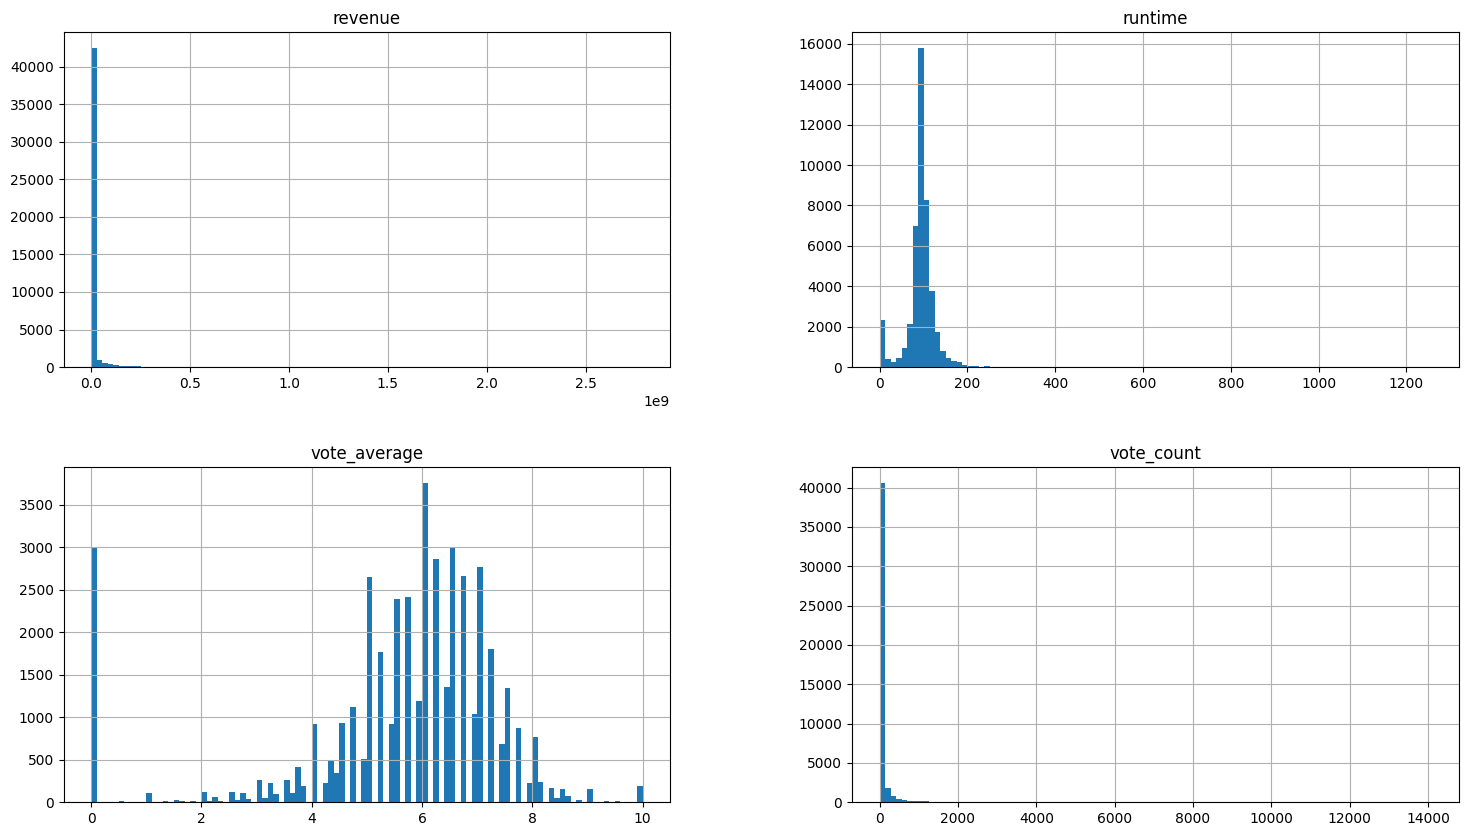

In [ ]:
df.hist(figsize= (18,10), bins =100)
plt.show()

Visualisierung der Daten zur Erkennung von Mustern, Trends und Anomalien

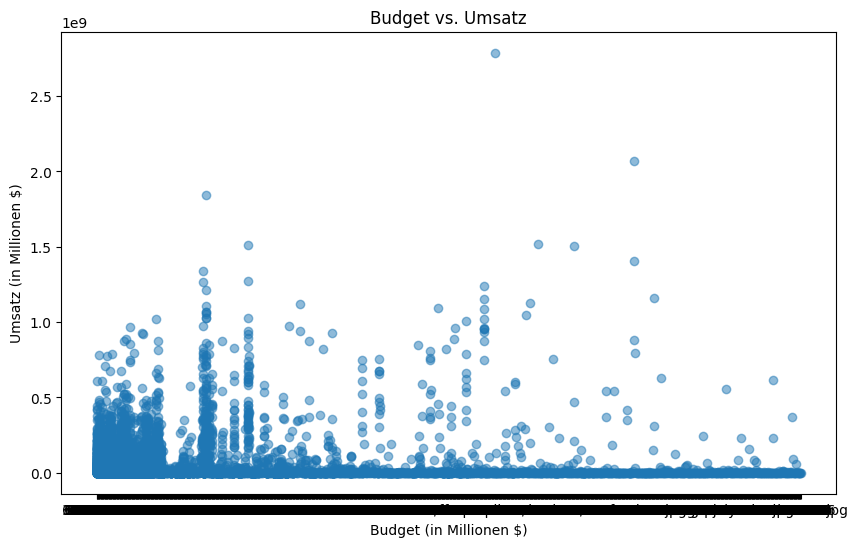

In [ ]:
#Zusammenhang zwischen Budget des Films und des Umsatzes? Hypthese "Filme mit höherem Budget generieren höheren Umsatz"#
plt.figure(figsize=(10, 6))
plt.scatter(df['budget'], df['revenue'], alpha=0.5)
plt.title('Budget vs. Umsatz')
plt.xlabel('Budget (in Millionen $)')
plt.ylabel('Umsatz (in Millionen $)')
plt.show()


Bei positiver Korrelation zwischen Budget und Umsatz --> Punkte verlaufen von inks unten nach rechts oben verlaufen (Filme mit höherem Budget generieren tendenziell höhere Umsätze). Wenn es jedoch keine oder eine negative Korrelation gibt--> weniger klare Tendenz in den Punkten sehen.

-->in unserem Fall keine klare Tendenz

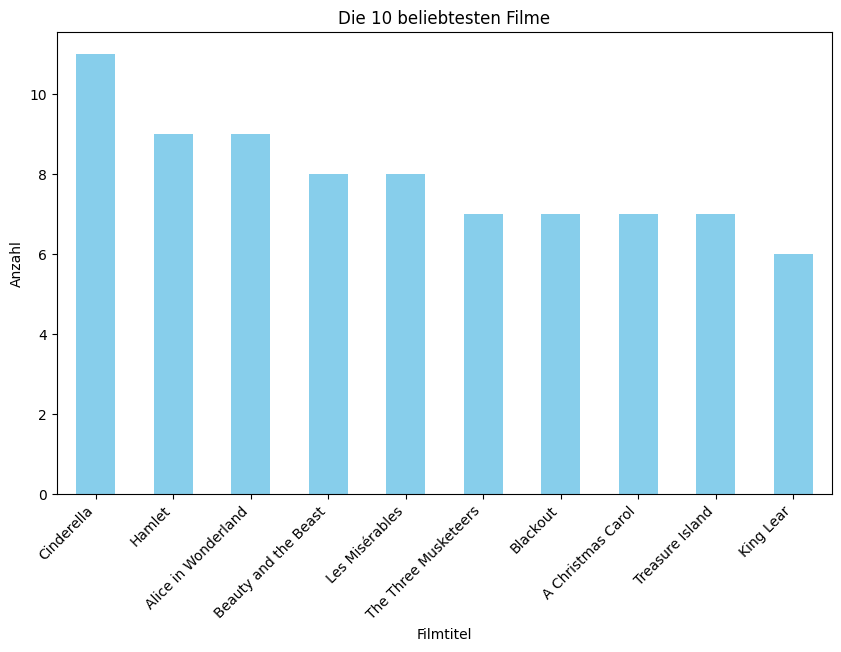

In [ ]:
# Die 10 beliebtesten Filme im Dataset (nach Häufigkeit)
top_filme = df['title'].value_counts().head(10)

# Visualisierung der beliebtesten Filme
plt.figure(figsize=(10, 6))
top_filme.plot(kind='bar', color='skyblue')
plt.title('Die 10 beliebtesten Filme')
plt.xlabel('Filmtitel')
plt.ylabel('Anzahl')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
df[df.title == 'Cinderella'] # In dem Dataset befinden sich 11 Einträge zum Film "Cinderella"#

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
993,False,"{'id': 55419, 'name': 'Cinderella Collection',...",2900000,"[{'id': 10751, 'name': 'Family'}, {'id': 14, '...",http://movies.disney.com/cinderella-1950,11224,tt0042332,en,Cinderella,Cinderella has faith her dreams of a better li...,...,1950-03-04,263591415.0,74.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The greatest love story ever told.,Cinderella,False,6.8,1760.0
13076,False,NaN,0,"[{'id': 10770, 'name': 'TV Movie'}, {'id': 107...",NaN,42884,tt0128996,en,Cinderella,Updated version of the classic Rodgers and Ham...,...,1997-11-02,0.0,88.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Cinderella,False,6.1,28.0
23507,False,NaN,0,"[{'id': 14, 'name': 'Fantasy'}, {'id': 18, 'na...",NaN,92349,tt0003772,en,Cinderella,Based on Charles Perrault's fairy tale: Cinder...,...,1914-12-28,0.0,52.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Cinderella,False,5.4,7.0
23518,False,NaN,0,"[{'id': 16, 'name': 'Animation'}, {'id': 10751...",NaN,105875,tt0910852,en,Cinderella,"Cinderella, the beautiful and kind-hearted rag...",...,2002-08-06,0.0,48.0,"[{'iso_639_1': 'af', 'name': 'Afrikaans'}]",Released,The version children love!,Cinderella,False,6.0,2.0
28391,False,NaN,0,"[{'id': 10751, 'name': 'Family'}, {'id': 10770...",http://www.betafilm.com/en/product/do/detail.h...,261985,tt1781790,en,Cenerentola,Once upon a time in post-war Rome: 13-year old...,...,2011-10-30,0.0,180.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Cinderella,False,5.3,9.0
28664,False,NaN,95000000,"[{'id': 10749, 'name': 'Romance'}, {'id': 14, ...",http://movies.disney.com/cinderella,150689,tt1661199,en,Cinderella,"When her father unexpectedly passes away, youn...",...,2015-03-12,543514353.0,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Midnight is just the beginning.,Cinderella,False,6.7,2426.0
34254,False,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10751, '...",NaN,42651,tt0168269,ru,Zolushka,"Based on a classic fairytale ""Cinderella"" bril...",...,1947-11-28,0.0,80.0,"[{'iso_639_1': 'ru', 'name': 'Pусский'}]",Released,NaN,Cinderella,False,4.8,5.0
35593,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,44459,tt0129672,en,Cinderella,The first of three TV-versions of the classic ...,...,1957-03-31,0.0,77.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Cinderella,False,5.9,5.0
35595,False,NaN,0,[],NaN,289673,tt0218891,en,Cinderella,Cinderella (named Zezolla) and her family live...,...,2000-01-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Cinderella,False,5.6,5.0
41074,False,NaN,0,"[{'id': 14, 'name': 'Fantasy'}, {'id': 27, 'na...",NaN,114108,tt0000230,fr,Cendrillon,A fairy godmother magically turns Cinderella's...,...,1899-10-01,0.0,5.0,"[{'iso_639_1': 'xx', 'name': 'No Language'}]",Released,NaN,Cinderella,False,5.5,19.0


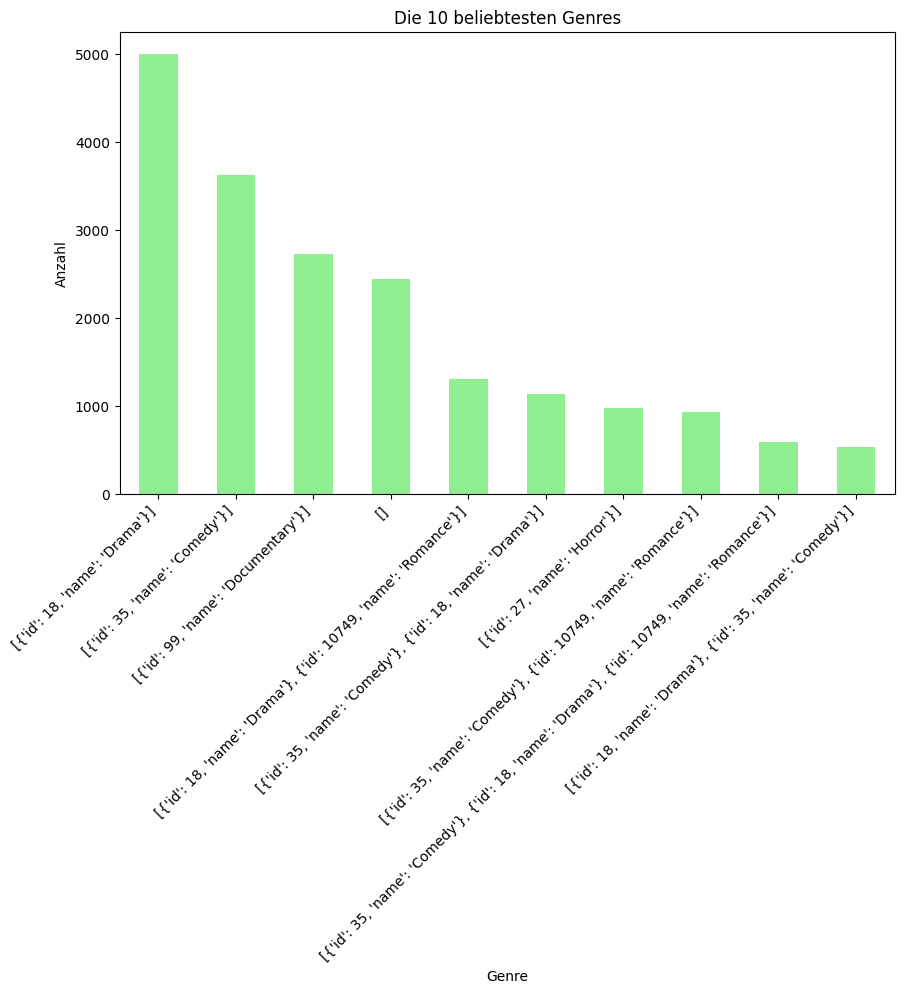

In [ ]:
# Die 10 beliebtesten Genres (nach Häufigkeit)
top_genres = df['genres'].explode().value_counts().head(10)

# Visualisierung der beliebtesten Genres
plt.figure(figsize=(10, 6))
top_genres.plot(kind='bar', color='lightgreen')
plt.title('Die 10 beliebtesten Genres')
plt.xlabel('Genre')
plt.ylabel('Anzahl')
plt.xticks(rotation=45, ha='right')
plt.show()

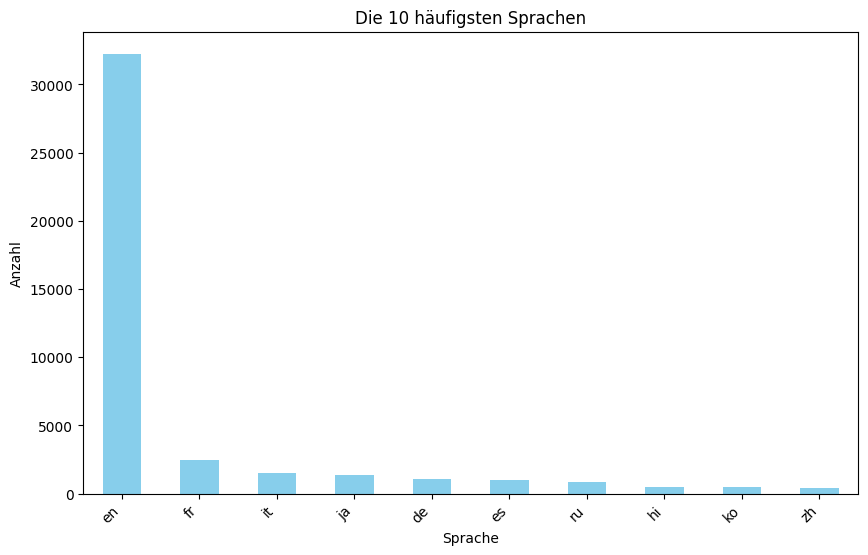

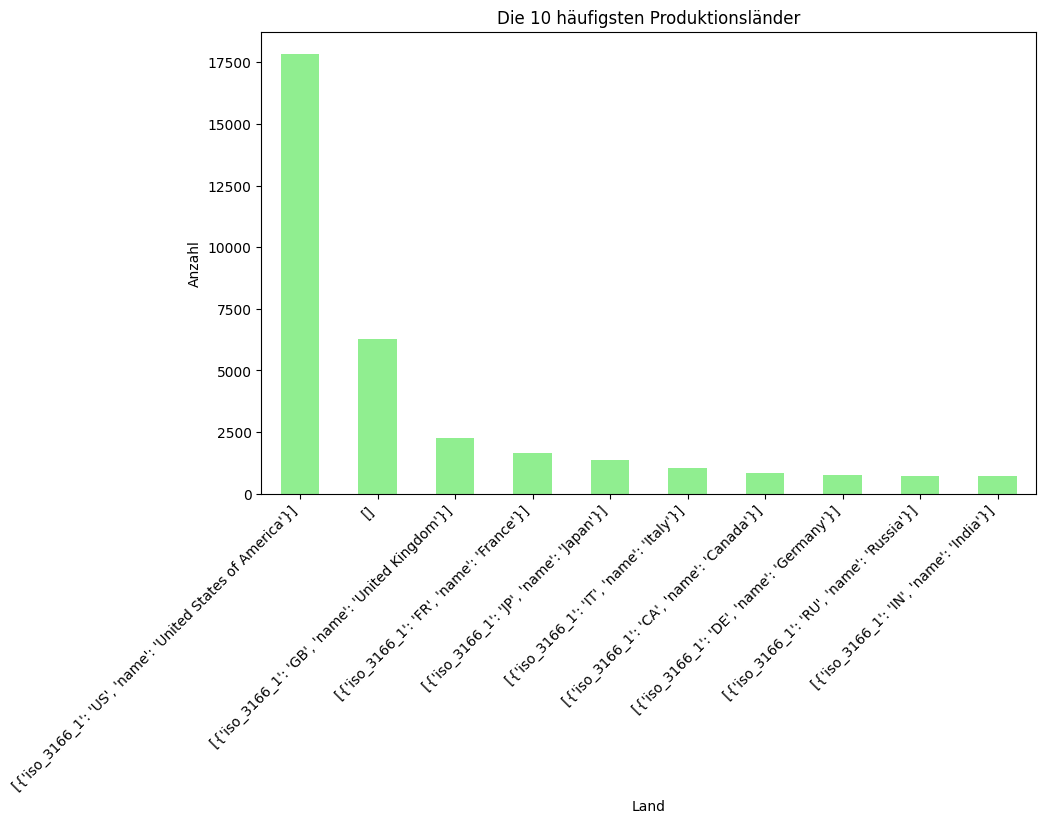

In [ ]:
# Die 10 häufigsten Sprachen
top_sprachen = df['original_language'].value_counts().head(10)

# Die 10 häufigsten Produktionsländer
top_laender = df['production_countries'].explode('production_countries').value_counts().head(10)

# Visualisierung der häufigsten Sprachen
plt.figure(figsize=(10, 6))
top_sprachen.plot(kind='bar', color='skyblue')
plt.title('Die 10 häufigsten Sprachen')
plt.xlabel('Sprache')
plt.ylabel('Anzahl')
plt.xticks(rotation=45, ha='right')
plt.show()

# Visualisierung der häufigsten Produktionsländer
plt.figure(figsize=(10, 6))
top_laender.plot(kind='bar', color='lightgreen')
plt.title('Die 10 häufigsten Produktionsländer')
plt.xlabel('Land')
plt.ylabel('Anzahl')
plt.xticks(rotation=45, ha='right')
plt.show()

Der Großteil der Filme in unserem Datensatz ist in englischer Sprache verfasst und wurde in America produziert


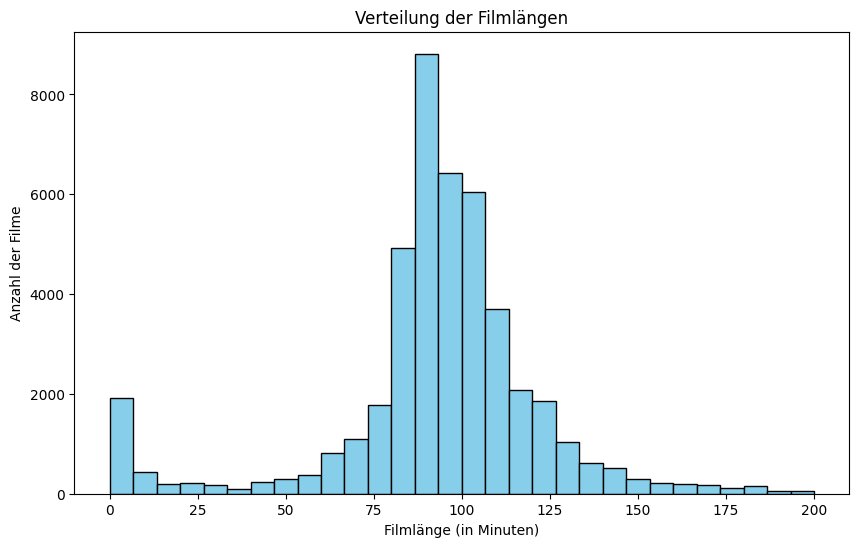

In [ ]:
# Histogramm der Filmlängen
plt.figure(figsize=(10, 6))
plt.hist(df['runtime'], bins=30, range=(0, 200), color='skyblue', edgecolor='black')
plt.title('Verteilung der Filmlängen')
plt.xlabel('Filmlänge (in Minuten)')
plt.ylabel('Anzahl der Filme')
plt.show()

klarer Trend zu erkennen im Hinblick auf die Filmlänge

---



In [ ]:
df = pd.read_csv("/content/ratings_.csv")

In [ ]:
# Grundlegende Statistiken
print(df.describe())

              userId        movieId         rating     timestamp
count  100004.000000  100004.000000  100004.000000  1.000040e+05
mean      347.011310   12548.664363       3.543608  1.129639e+09
std       195.163838   26369.198969       1.058064  1.916858e+08
min         1.000000       1.000000       0.500000  7.896520e+08
25%       182.000000    1028.000000       3.000000  9.658478e+08
50%       367.000000    2406.500000       4.000000  1.110422e+09
75%       520.000000    5418.000000       4.000000  1.296192e+09
max       671.000000  163949.000000       5.000000  1.476641e+09


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100004 entries, 0 to 100003
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100004 non-null  int64  
 1   movieId    100004 non-null  int64  
 2   rating     100004 non-null  float64
 3   timestamp  100004 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB
None


In [ ]:
# Fehlende Werte --> keine fehlenden Werte
print(df.isnull().sum())

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64


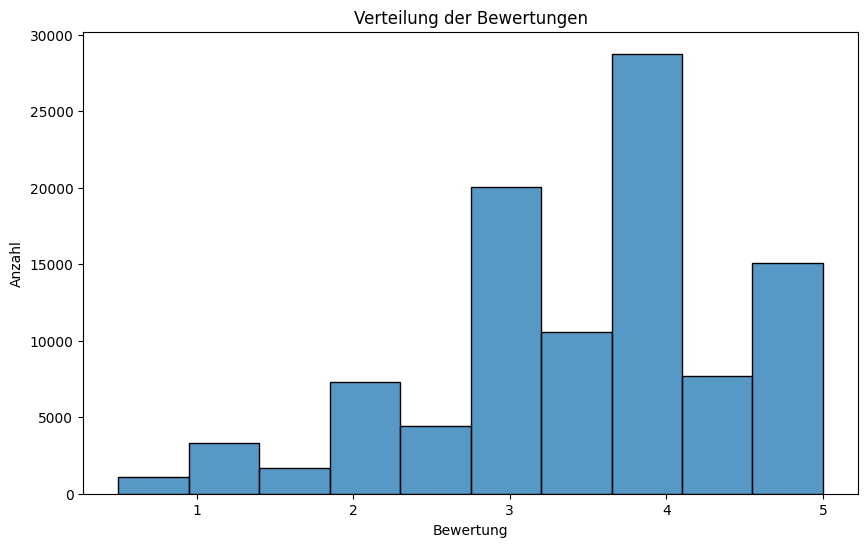

In [ ]:
# Verteilung der Bewertungen
plt.figure(figsize=(10, 6))
sns.histplot(df['rating'], bins=10, kde=False)
plt.title('Verteilung der Bewertungen')
plt.xlabel('Bewertung')
plt.ylabel('Anzahl')
plt.show()

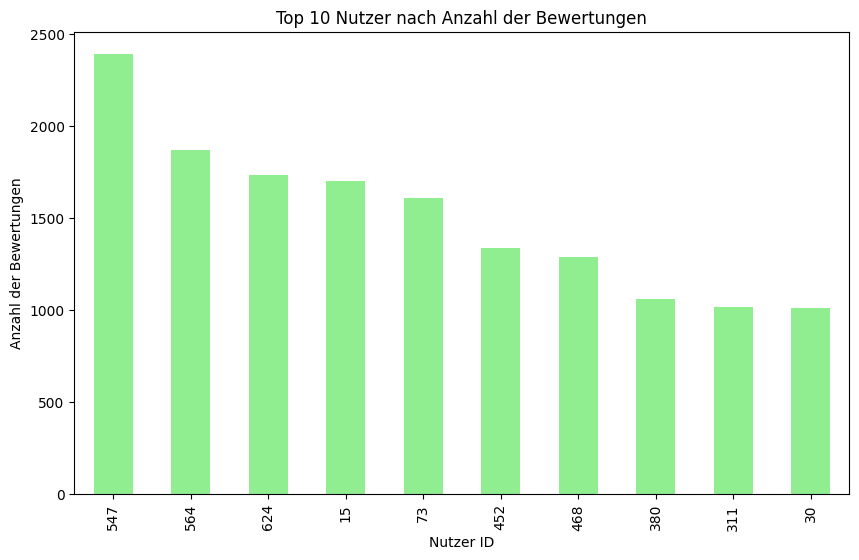

In [ ]:
#Analyse des Nutzerverhaltens#
# Bewertungen pro Nutzer
ratings_per_user = df.groupby('userId').size().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
ratings_per_user.head(10).plot(kind='bar', color='lightgreen')
plt.title('Top 10 Nutzer nach Anzahl der Bewertungen')
plt.xlabel('Nutzer ID')
plt.ylabel('Anzahl der Bewertungen')
plt.show()

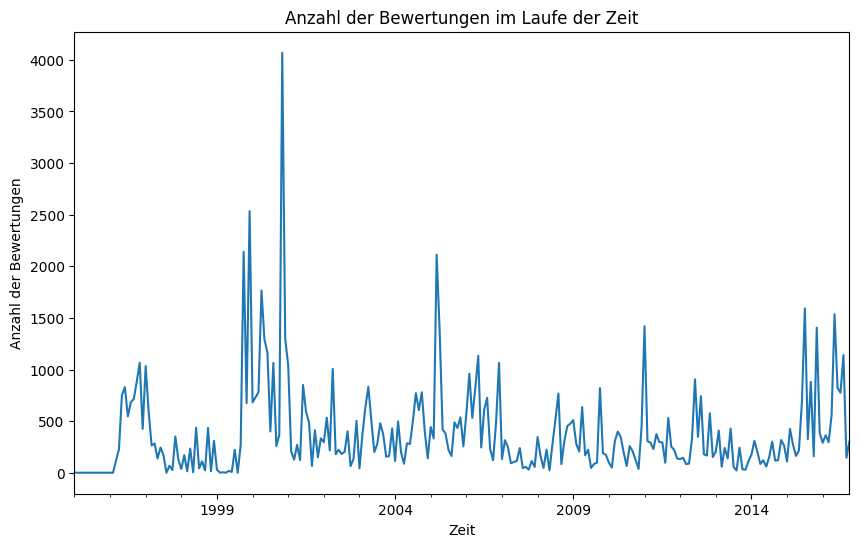

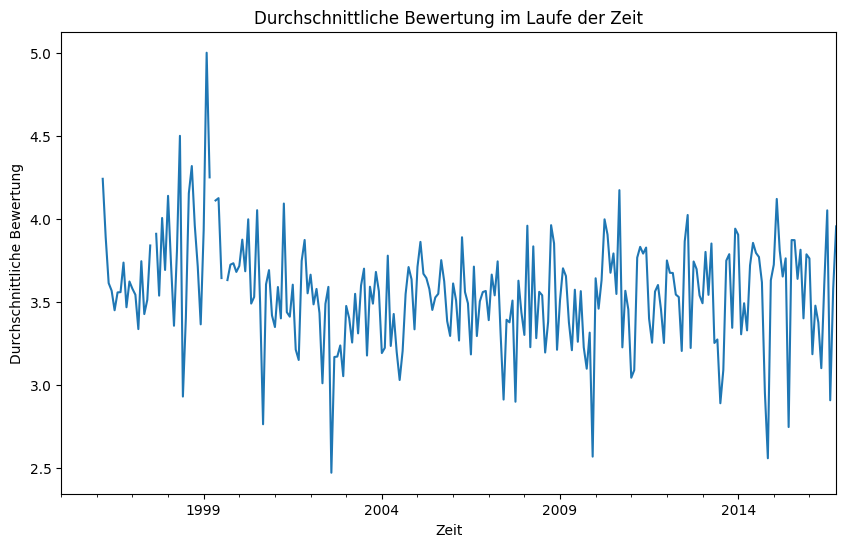

In [ ]:
#zeitbasierte Analyse#
# Bewertungen über die Zeit
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')
df.set_index('timestamp', inplace=True)
ratings_over_time = df.resample('M').size()
plt.figure(figsize=(10, 6))
ratings_over_time.plot()
plt.title('Anzahl der Bewertungen im Laufe der Zeit')
plt.xlabel('Zeit')
plt.ylabel('Anzahl der Bewertungen')
plt.show()

# Durchschnittliche Bewertung über die Zeit
average_rating_over_time = df.resample('M')['rating'].mean()
plt.figure(figsize=(10, 6))
average_rating_over_time.plot()
plt.title('Durchschnittliche Bewertung im Laufe der Zeit')
plt.xlabel('Zeit')
plt.ylabel('Durchschnittliche Bewertung')
plt.show()

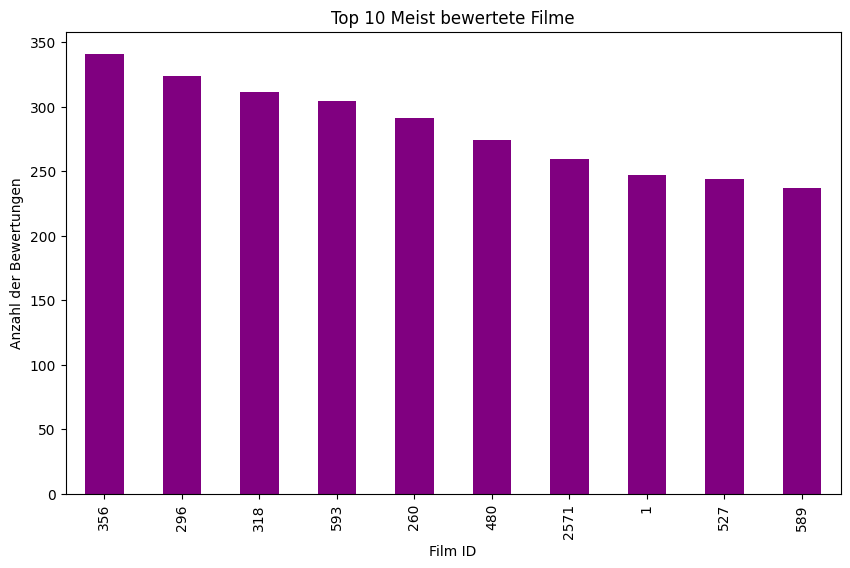

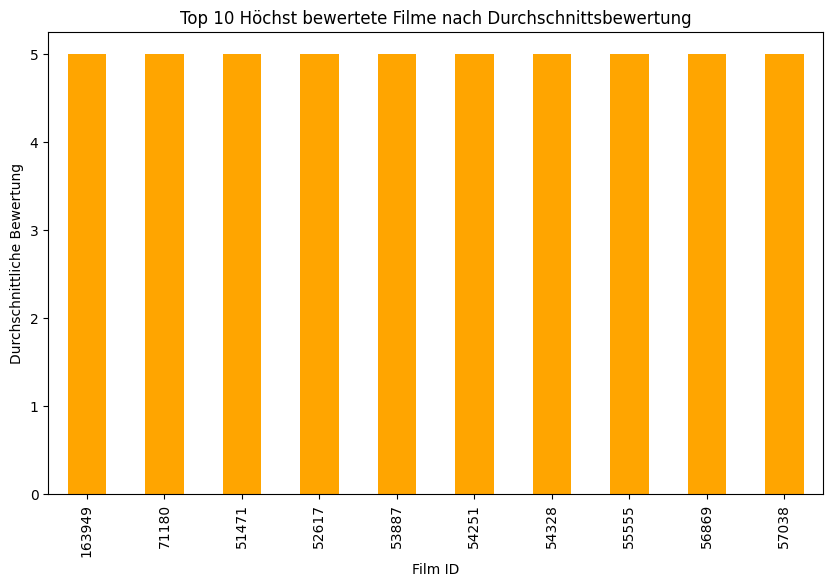

In [ ]:
#Filmbeliebtheit#

# Meist bewertete Filme
most_rated_movies = df.groupby('movieId').size().sort_values(ascending=False)[:10]

plt.figure(figsize=(10, 6))
most_rated_movies.plot(kind='bar', color='purple')
plt.title('Top 10 Meist bewertete Filme')
plt.xlabel('Film ID')
plt.ylabel('Anzahl der Bewertungen')
plt.show()
# Höchst bewertete Filme nach durchschnittlicher Bewertung
average_rating_per_movie = df.groupby('movieId')['rating'].mean()
highest_rated_movies = average_rating_per_movie.sort_values(ascending=False)[:10]

plt.figure(figsize=(10, 6))
highest_rated_movies.plot(kind='bar', color='orange')
plt.title('Top 10 Höchst bewertete Filme nach Durchschnittsbewertung')
plt.xlabel('Film ID')
plt.ylabel('Durchschnittliche Bewertung')
plt.show()

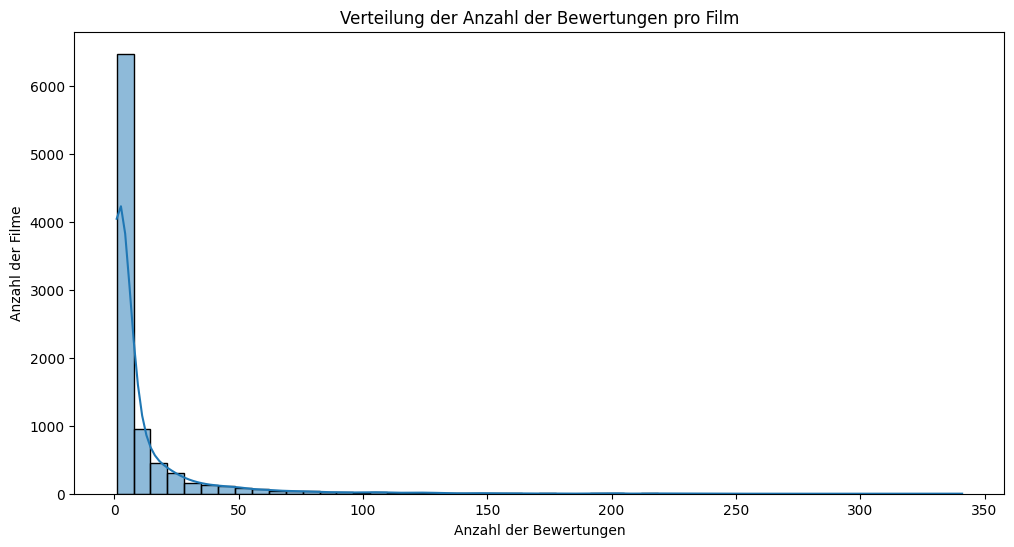

In [ ]:
# Laden des Datensatzes
df_ratings = pd.read_csv("/content/ratings_.csv")

# Anzahl der Bewertungen pro Film zählen
rating_counts = df_ratings['movieId'].value_counts().reset_index()
rating_counts.columns = ['movieId', 'rating_count']

# Visualisierung der Bewertungsverteilung
plt.figure(figsize=(12, 6))
sns.histplot(data=rating_counts, x='rating_count', bins=50, kde=True)
plt.title('Verteilung der Anzahl der Bewertungen pro Film')
plt.xlabel('Anzahl der Bewertungen')
plt.ylabel('Anzahl der Filme')
plt.show()

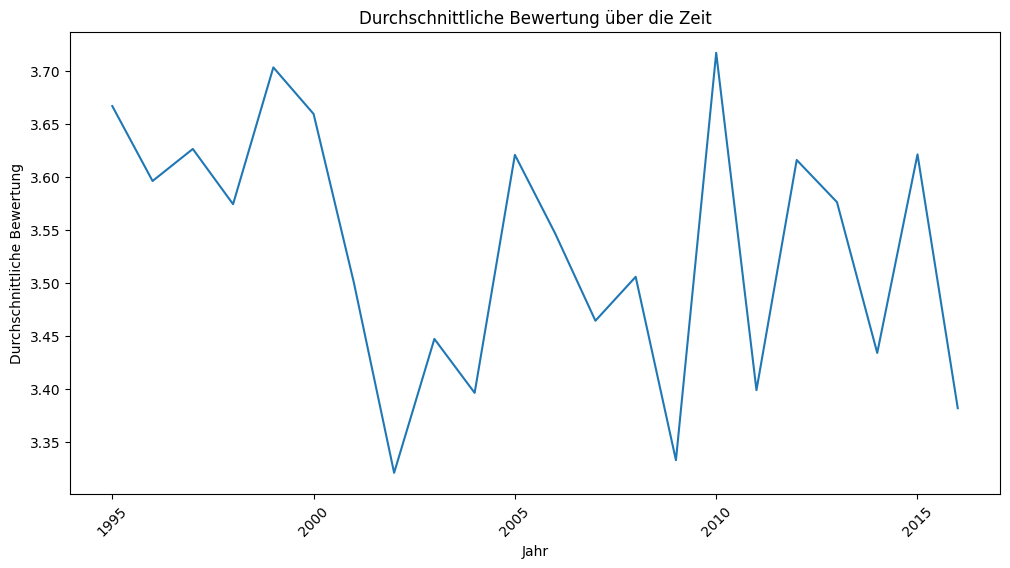

In [ ]:
# Konvertierung des Zeitstempels in ein Datumsformat
df_ratings['timestamp'] = pd.to_datetime(df_ratings['timestamp'], unit='s')

# Extrahieren des Jahres aus dem Zeitstempel
df_ratings['year'] = df_ratings['timestamp'].dt.year

# Berechnung der durchschnittlichen Bewertung pro Jahr
avg_rating_per_year = df_ratings.groupby('year')['rating'].mean().reset_index()

# Visualisierung der durchschnittlichen Bewertung über die Zeit
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='rating', data=avg_rating_per_year)
plt.title('Durchschnittliche Bewertung über die Zeit')
plt.xlabel('Jahr')
plt.ylabel('Durchschnittliche Bewertung')
plt.xticks(rotation=45)
plt.show()